In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, PowerTransformer, StandardScaler
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from tqdm.notebook import tqdm
from sklearn.cluster import KMeans
import statsmodels.api as sm
from xgboost import XGBClassifier
import os
import pickle
import pdb
from datetime import datetime, timedelta
from pprint import pprint

import keras
import warnings
warnings.filterwarnings('ignore')

import time
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier
from collections import Counter
from datetime import datetime, timedelta



In [40]:
bit = pd.read_csv('BitcoinHeistData.csv') 

In [41]:
bit

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,1.000500e+08,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,1.000000e+08,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,2.000000e+08,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,7.120000e+07,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,2.000000e+08,princetonLocky
...,...,...,...,...,...,...,...,...,...,...
2916692,12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry,2018,330,0,0.111111,1,0,1,1.255809e+09,white
2916693,1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2,2018,330,0,1.000000,1,0,1,4.409699e+07,white
2916694,1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw,2018,330,2,12.000000,6,6,35,2.398267e+09,white
2916695,15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a,2018,330,0,0.500000,1,0,1,1.780427e+08,white


In [42]:
bit.head()

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,0.008333,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,0.000244,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,0.003906,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,0.072848,456,0,1,200000000.0,princetonLocky


In [43]:
bit.shape

(2916697, 10)

In [44]:
bit.label.value_counts()

label
white                          2875284
paduaCryptoWall                  12390
montrealCryptoLocker              9315
princetonCerber                   9223
princetonLocky                    6625
montrealCryptXXX                  2419
montrealNoobCrypt                  483
montrealDMALockerv3                354
montrealDMALocker                  251
montrealSamSam                      62
montrealCryptoTorLocker2015         55
montrealGlobeImposter               55
montrealGlobev3                     34
montrealGlobe                       32
montrealWannaCry                    28
montrealRazy                        13
montrealAPT                         11
paduaKeRanger                       10
montrealFlyper                       9
montrealXTPLocker                    8
montrealXLockerv5.0                  7
montrealVenusLocker                  7
montrealCryptConsole                 7
montrealEDA2                         6
montrealJigSaw                       4
paduaJigsaw        

In [45]:
# Data description
print(bit.describe())

               year           day        length        weight         count  \
count  2.916697e+06  2.916697e+06  2.916697e+06  2.916697e+06  2.916697e+06   
mean   2.014475e+03  1.814572e+02  4.500859e+01  5.455192e-01  7.216446e+02   
std    2.257398e+00  1.040118e+02  5.898236e+01  3.674255e+00  1.689676e+03   
min    2.011000e+03  1.000000e+00  0.000000e+00  3.606469e-94  1.000000e+00   
25%    2.013000e+03  9.200000e+01  2.000000e+00  2.148438e-02  1.000000e+00   
50%    2.014000e+03  1.810000e+02  8.000000e+00  2.500000e-01  1.000000e+00   
75%    2.016000e+03  2.710000e+02  1.080000e+02  8.819482e-01  5.600000e+01   
max    2.018000e+03  3.650000e+02  1.440000e+02  1.943749e+03  1.449700e+04   

             looped     neighbors        income  
count  2.916697e+06  2.916697e+06  2.916697e+06  
mean   2.385067e+02  2.206516e+00  4.464889e+09  
std    9.663217e+02  1.791877e+01  1.626860e+11  
min    0.000000e+00  1.000000e+00  3.000000e+07  
25%    0.000000e+00  1.000000e+00  7.4

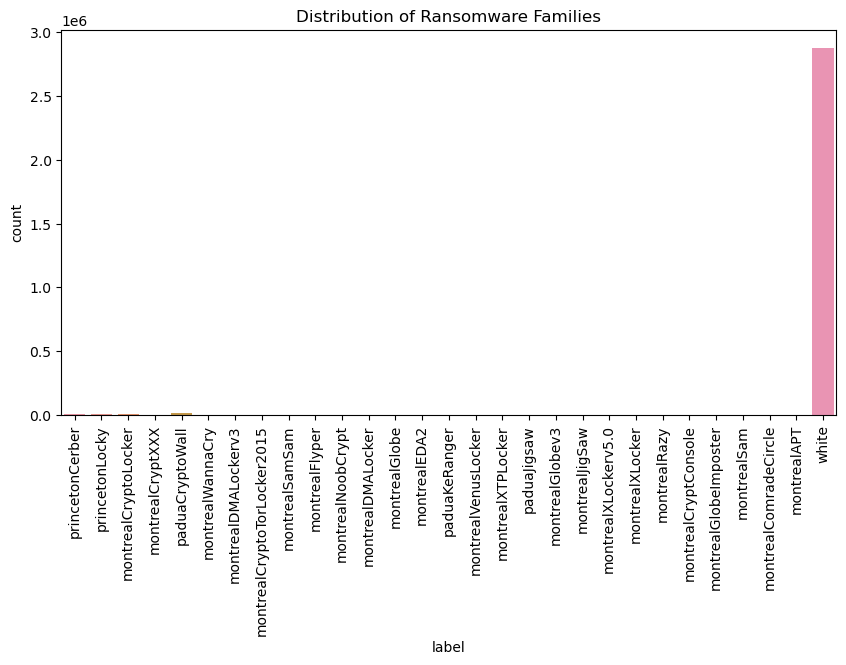

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data=bit, x='label')
plt.title('Distribution of Ransomware Families')
plt.xticks(rotation=90)
plt.show()

In [47]:
# Check for missing values
print(bit.isnull().sum())

# Drop rows with missing values
bit = bit.dropna()

address      0
year         0
day          0
length       0
weight       0
count        0
looped       0
neighbors    0
income       0
label        0
dtype: int64


# Preprocessing

In [48]:
bit['label'].nunique()

29

In [49]:
bit['label'].unique()

array(['princetonCerber', 'princetonLocky', 'montrealCryptoLocker',
       'montrealCryptXXX', 'paduaCryptoWall', 'montrealWannaCry',
       'montrealDMALockerv3', 'montrealCryptoTorLocker2015',
       'montrealSamSam', 'montrealFlyper', 'montrealNoobCrypt',
       'montrealDMALocker', 'montrealGlobe', 'montrealEDA2',
       'paduaKeRanger', 'montrealVenusLocker', 'montrealXTPLocker',
       'paduaJigsaw', 'montrealGlobev3', 'montrealJigSaw',
       'montrealXLockerv5.0', 'montrealXLocker', 'montrealRazy',
       'montrealCryptConsole', 'montrealGlobeImposter', 'montrealSam',
       'montrealComradeCircle', 'montrealAPT', 'white'], dtype=object)

In [50]:
bit['label'] = bit['label'].astype(str)

# Label encoding for 'address' feature
le = preprocessing.LabelEncoder()
bit['address'] = le.fit_transform(bit['address'])

# family categories
bit.loc[bit['label'].str.startswith("m"),'label']="Montreal"
bit.loc[bit['label'].str.startswith("pa"),'label']="Panuda"
bit.loc[bit['label'].str.startswith("pr"),'label']="Princeton"
bit.loc[bit['label'].str.startswith("w"),'label']="White"

# Encode target labels with value between 0 and n_classes-1
le = preprocessing.LabelEncoder()
bit['label'] = le.fit_transform(bit['label'])

for class_, label in enumerate(le.classes_):
    print(f'The label {label} is encoded as {class_}')

class_distribution = bit['label'].value_counts()
print(class_distribution)

The label Montreal is encoded as 0
The label Panuda is encoded as 1
The label Princeton is encoded as 2
The label White is encoded as 3
label
3    2875284
2      15848
0      13163
1      12402
Name: count, dtype: int64


# New feature Constructing

In [51]:
# Constructing new feature: n_address_feature
bit['n_address_feature'] = bit.groupby('address')['address'].transform('count')

# Constructing new feature: quarter_number
def day_to_quarter(day):
    if day <= 90:
        return 1
    elif day <= 181:
        return 2
    elif day <= 273:
        return 3
    else:
        return 4

bit['quarter_number'] = bit['day'].apply(day_to_quarter)


# Constructing new feature: is_close_to_holiday
public_holidays = [1, 15, 53, 105, 151, 185, 121, 285, 315, 330, 331, 335, 360]
#     1, # New Year’s Day, January 1
#     15, # Birthday of Martin Luther King, Jr, 15 January
#     53, # Washington's birthday February 22
#     105, # Tax Day, April 15
#     151, # Memorial day, May 31
#     185, # Independence day, July 4
#     121, # Labor day, May 1
#     285, # Columbus day, October 12
#     315, # Veteran's day, November 11
#     330, # Thanksgiving day, November 26
#     331, # Black Friday, day after Thanksgiving
#     335, # Cyber Monday, Monday after Thanksgiving
#     360, # Christmas day, December 25

def is_close_to_holiday(holiday, day):
    return abs(holiday - day) <= 7

bit['is_close_to_holiday'] = bit['day'].apply(lambda day: any(is_close_to_holiday(holiday, day) for holiday in public_holidays))

def get_day_of_week(year, day_of_year):
    # Convert the year and day_of_year into a datetime object
    first_day_of_year = datetime(int(year), 1, 1)
    # Subtract 1 because day_of_year starts at 1
    transaction_date = first_day_of_year + timedelta(days=int(day_of_year)-1)
    # Return the day of the week (0 is Monday, 6 is Sunday)
    return transaction_date.weekday()

bit['day_of_week'] = bit.apply(lambda row: get_day_of_week(row['year'], row['day']), axis=1)


In [52]:

# epsilon is used to avoid 0
epsilon = 1e-10 
bit['average_income_per_transaction'] = bit.groupby('address')['income'].transform('mean')
bit['transaction_count'] = bit.groupby('address')['count'].transform('count')
bit['looped_ratio'] = bit['looped'] / (bit['transaction_count'] + epsilon)
bit['merge_behavior'] = bit['weight'] / (bit['count'] + epsilon)
bit['cybercrime_related'] = ((bit['looped_ratio'] > 0.5) & (bit['merge_behavior'] > 0.5)).astype(int)
bit['length_weight'] = bit['length'] * bit['weight']
bit['count_looped'] = bit['count'] * bit['looped']
bit['month'] = bit['day'] // 30
bit['week'] = bit['day'] // 7
bit['total_volume'] = bit.groupby('address')['income'].transform('sum')
bit['average_volume'] = bit.groupby('address')['income'].transform('mean')
bit['transaction_frequency'] = bit.groupby('address')['count'].transform('sum')

# Get a list of all columns in df
all_columns = bit.columns.tolist()

# Remove the 'label' column if it's not appropriate for clustering
if 'label' in all_columns:
    all_columns.remove('label')

# Now all_columns contains all features
features = bit[all_columns]

In [53]:
# Perform clustering
kmeans = KMeans(n_clusters=3,n_init=10,random_state=0).fit(features)

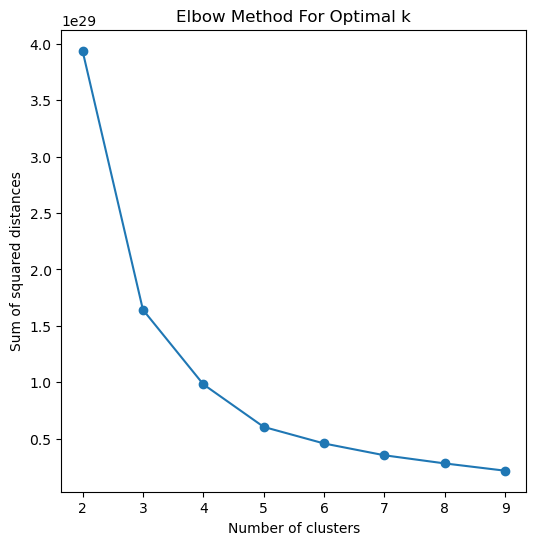

In [54]:
ssd = []
for k in range(2, 10):  # change the range as needed
    kmeans = KMeans(n_clusters=k,n_init=10,random_state=0).fit(features)
    ssd.append(kmeans.inertia_)

# Plot SSD against k
plt.figure(figsize=(6, 6))
plt.plot(range(2, 10), ssd, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [55]:
kmeans = KMeans(n_clusters=3,n_init=10,random_state=0).fit(features)
bit['cluster'] = kmeans.labels_

In [56]:
# Move the label column to the end
label = bit['label']
bit = bit.drop(columns=['label'])
bit['label'] = label

In [57]:
bit

,address,year,day,length,weight,count,looped,neighbors,income,n_address_feature,...,cybercrime_related,length_weight,count_looped,month,week,total_volume,average_volume,transaction_frequency,cluster,label
0,23,2017,11,18,0.008333,1,0,2,1.000500e+08,1,...,0,0.150000,0,0,1,1.000500e+08,1.000500e+08,1,0,2
1,128,2016,132,44,0.000244,1,0,1,1.000000e+08,1,...,0,0.010742,0,4,18,1.000000e+08,1.000000e+08,1,0,2
2,169,2016,246,0,1.000000,1,0,2,2.000000e+08,1,...,0,0.000000,0,8,35,2.000000e+08,2.000000e+08,1,0,2
3,217,2016,322,72,0.003906,1,0,2,7.120000e+07,1,...,0,0.281250,0,10,46,7.120000e+07,7.120000e+07,1,0,2
4,293,2016,238,144,0.072848,456,0,1,2.000000e+08,1,...,0,10.490171,0,7,34,2.000000e+08,2.000000e+08,456,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916692,30849,2018,330,0,0.111111,1,0,1,1.255809e+09,1,...,0,0.000000,0,11,47,1.255809e+09,1.255809e+09,1,0,3
2916693,2192574,2018,330,0,1.000000,1,0,1,4.409699e+07,1,...,0,0.000000,0,11,47,4.409699e+07,4.409699e+07,1,0,3
2916694,1824270,2018,330,2,12.000000,6,6,35,2.398267e+09,7,...,1,24.000000,36,11,47,5.344682e+10,7.635260e+09,84,0,3
2916695,389289,2018,330,0,0.500000,1,0,1,1.780427e+08,1,...,0,0.000000,0,11,47,1.780427e+08,1.780427e+08,1,0,3


In [58]:
# Define a threshold for the Z-score method
z_threshold = 3

# Create a new DataFrame with only the numerical columns excluding the label
numerical_df = bit.drop(columns=['label']).select_dtypes(include=[np.number])

# Calculate the Z-score for each data point
z_scores = np.abs((numerical_df - numerical_df.mean()) / numerical_df.std())

# Identify outliers based on the threshold
outliers = numerical_df[(z_scores > z_threshold).any(axis=1)]

# Remove outliers from the dataset
bit = bit[(z_scores <= z_threshold).all(axis=1)].copy()

In [59]:
bit['label'].value_counts()

label
3    2671631
2      15256
1       8099
0       6917
Name: count, dtype: int64

In [60]:
bit

,address,year,day,length,weight,count,looped,neighbors,income,n_address_feature,...,cybercrime_related,length_weight,count_looped,month,week,total_volume,average_volume,transaction_frequency,cluster,label
0,23,2017,11,18,0.008333,1,0,2,1.000500e+08,1,...,0,0.150000,0,0,1,1.000500e+08,1.000500e+08,1,0,2
1,128,2016,132,44,0.000244,1,0,1,1.000000e+08,1,...,0,0.010742,0,4,18,1.000000e+08,1.000000e+08,1,0,2
2,169,2016,246,0,1.000000,1,0,2,2.000000e+08,1,...,0,0.000000,0,8,35,2.000000e+08,2.000000e+08,1,0,2
3,217,2016,322,72,0.003906,1,0,2,7.120000e+07,1,...,0,0.281250,0,10,46,7.120000e+07,7.120000e+07,1,0,2
4,293,2016,238,144,0.072848,456,0,1,2.000000e+08,1,...,0,10.490171,0,7,34,2.000000e+08,2.000000e+08,456,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916689,2410962,2018,330,26,1.000000,1,0,2,1.381033e+08,1,...,0,26.000000,0,11,47,1.381033e+08,1.381033e+08,1,0,3
2916690,2404793,2018,330,56,0.041667,1,0,2,3.356822e+08,1,...,0,2.333333,0,11,47,3.356822e+08,3.356822e+08,1,0,3
2916692,30849,2018,330,0,0.111111,1,0,1,1.255809e+09,1,...,0,0.000000,0,11,47,1.255809e+09,1.255809e+09,1,0,3
2916693,2192574,2018,330,0,1.000000,1,0,1,4.409699e+07,1,...,0,0.000000,0,11,47,4.409699e+07,4.409699e+07,1,0,3


In [61]:
#PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

numerical_cols = bit.select_dtypes(include=[np.number]).drop(columns=['label']).columns
bit[numerical_cols] = pt.fit_transform(bit[numerical_cols])

In [62]:
bit

,address,year,day,length,weight,count,looped,neighbors,income,n_address_feature,...,cybercrime_related,length_weight,count_looped,month,week,total_volume,average_volume,transaction_frequency,cluster,label
0,-2.200465,6.691869e-13,-1.892670,0.378310,-1.155154,-0.709017,-0.343465,0.521575,-0.556439,-0.362158,...,0.0,-0.663055,-0.340715,-1.792756,-1.893674,-0.673996,-0.581985,-0.778954,0.0,2
1,-2.198043,4.126144e-13,-0.381495,0.812989,-1.199514,-0.709017,-0.343465,-1.374059,-0.556838,-0.362158,...,0.0,-0.913038,-0.340715,-0.374862,-0.417609,-0.674366,-0.582384,-0.778954,0.0,2
2,-2.197295,4.126144e-13,0.653242,-1.288582,1.244587,-0.709017,-0.343465,0.521575,-0.046927,-0.362158,...,0.0,-0.934793,-0.340715,0.723158,0.669250,-0.194108,-0.071128,-0.778954,0.0,2
3,-2.196484,4.126144e-13,1.267038,1.047173,-1.179325,-0.709017,-0.343465,0.521575,-0.839304,-0.362158,...,0.0,-0.470924,-0.340715,1.219434,1.295465,-0.934222,-0.864829,-0.778954,0.0,2
4,-2.195300,4.126144e-13,0.585784,1.367866,-0.830044,1.632429,-0.343465,-1.374059,-0.046927,-0.362158,...,0.0,1.412074,-0.340715,0.463936,0.609923,-0.194108,-0.071128,1.476740,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916689,1.349818,9.252044e-13,1.329168,0.558195,1.244587,-0.709017,-0.343465,0.521575,-0.308823,-0.362158,...,0.0,1.636174,-0.340715,1.458230,1.350296,-0.442689,-0.333951,-0.778954,0.0,3
2916690,1.343417,9.252044e-13,1.329168,0.928267,-0.981102,-0.709017,-0.343465,0.521575,0.282527,-0.362158,...,0.0,0.709921,-0.340715,1.458230,1.350296,0.125032,0.260268,-0.778954,0.0,3
2916692,-2.036496,9.252044e-13,1.329168,-1.288582,-0.658593,-0.709017,-0.343465,-1.374059,0.958795,-0.362158,...,0.0,-0.934793,-0.340715,1.458230,1.350296,0.807654,0.943756,-0.778954,0.0,3
2916693,1.120159,9.252044e-13,1.329168,-1.288582,1.244587,-0.709017,-0.343465,-1.374059,-1.278790,-0.362158,...,0.0,-0.934793,-0.340715,1.458230,1.350296,-1.330926,-1.303318,-0.778954,0.0,3


In [63]:
# Feature scaling
scaler = MinMaxScaler()
bit[numerical_cols] = scaler.fit_transform(bit[numerical_cols])

In [64]:
bit

,address,year,day,length,weight,count,looped,neighbors,income,n_address_feature,...,cybercrime_related,length_weight,count_looped,month,week,total_volume,average_volume,transaction_frequency,cluster,label
0,0.000253,0.857961,0.062835,0.627489,0.012028,0.000000,0.0,0.298088,0.277443,0.0,...,0.0,0.096372,0.0,0.000000,0.038482,0.232624,0.273815,0.000000,0.0,2
1,0.000894,0.715614,0.468752,0.791121,0.000356,0.000000,0.0,0.000000,0.277343,0.0,...,0.0,0.007715,0.0,0.406922,0.442411,0.232539,0.273717,0.000000,0.0,2
2,0.001092,0.715614,0.746693,0.000000,0.643462,0.000000,0.0,0.298088,0.404329,0.0,...,0.0,0.000000,0.0,0.722043,0.739832,0.343862,0.399690,0.000000,0.0,2
3,0.001307,0.715614,0.911565,0.879278,0.005668,0.000000,0.0,0.298088,0.206999,0.0,...,0.0,0.164511,0.0,0.864469,0.911197,0.172304,0.204123,0.000000,0.0,2
4,0.001620,0.715614,0.728573,1.000000,0.097573,0.950441,0.0,0.000000,0.404329,0.0,...,0.0,0.832317,0.0,0.647649,0.723597,0.343862,0.399690,0.913812,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916689,0.940333,1.000000,0.928253,0.695205,0.643462,0.000000,0.0,0.298088,0.339108,0.0,...,0.0,0.911794,0.0,0.933001,0.926201,0.286241,0.334930,0.000000,0.0,3
2916690,0.938638,1.000000,0.928253,0.834516,0.057826,0.000000,0.0,0.298088,0.486375,0.0,...,0.0,0.583298,0.0,0.933001,0.926201,0.417838,0.481345,0.000000,0.0,3
2916692,0.043670,1.000000,0.928253,0.000000,0.142686,0.000000,0.0,0.000000,0.654789,0.0,...,0.0,0.000000,0.0,0.933001,0.926201,0.576069,0.649756,0.000000,0.0,3
2916693,0.879521,1.000000,0.928253,0.000000,0.643462,0.000000,0.0,0.000000,0.097552,0.0,...,0.0,0.000000,0.0,0.933001,0.926201,0.080349,0.096080,0.000000,0.0,3


In [65]:
#dataset saved
#bit.to_csv('preprocessed_data.csv', index=False)


# data imbalance

In [2]:
df=pd.read_csv("preprocessed_data.csv")

In [3]:
df

,address,year,day,length,weight,count,looped,neighbors,income,n_address_feature,...,cybercrime_related,length_weight,count_looped,month,week,total_volume,average_volume,transaction_frequency,cluster,label
0,0.000253,0.857961,0.062835,0.627489,0.012028,0.000000,0.0,0.298088,0.277443,0.0,...,0.0,0.096372,0.0,0.000000,0.038482,0.232624,0.273815,0.000000,0.0,2
1,0.000894,0.715614,0.468752,0.791121,0.000356,0.000000,0.0,0.000000,0.277343,0.0,...,0.0,0.007715,0.0,0.406922,0.442411,0.232539,0.273717,0.000000,0.0,2
2,0.001092,0.715614,0.746693,0.000000,0.643462,0.000000,0.0,0.298088,0.404329,0.0,...,0.0,0.000000,0.0,0.722043,0.739832,0.343862,0.399690,0.000000,0.0,2
3,0.001307,0.715614,0.911565,0.879278,0.005668,0.000000,0.0,0.298088,0.206999,0.0,...,0.0,0.164511,0.0,0.864469,0.911197,0.172304,0.204123,0.000000,0.0,2
4,0.001620,0.715614,0.728573,1.000000,0.097573,0.950441,0.0,0.000000,0.404329,0.0,...,0.0,0.832317,0.0,0.647649,0.723597,0.343862,0.399690,0.913812,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701898,0.940333,1.000000,0.928253,0.695205,0.643462,0.000000,0.0,0.298088,0.339108,0.0,...,0.0,0.911794,0.0,0.933001,0.926201,0.286241,0.334930,0.000000,0.0,3
2701899,0.938638,1.000000,0.928253,0.834516,0.057826,0.000000,0.0,0.298088,0.486375,0.0,...,0.0,0.583298,0.0,0.933001,0.926201,0.417838,0.481345,0.000000,0.0,3
2701900,0.043670,1.000000,0.928253,0.000000,0.142686,0.000000,0.0,0.000000,0.654789,0.0,...,0.0,0.000000,0.0,0.933001,0.926201,0.576069,0.649756,0.000000,0.0,3
2701901,0.879521,1.000000,0.928253,0.000000,0.643462,0.000000,0.0,0.000000,0.097552,0.0,...,0.0,0.000000,0.0,0.933001,0.926201,0.080349,0.096080,0.000000,0.0,3


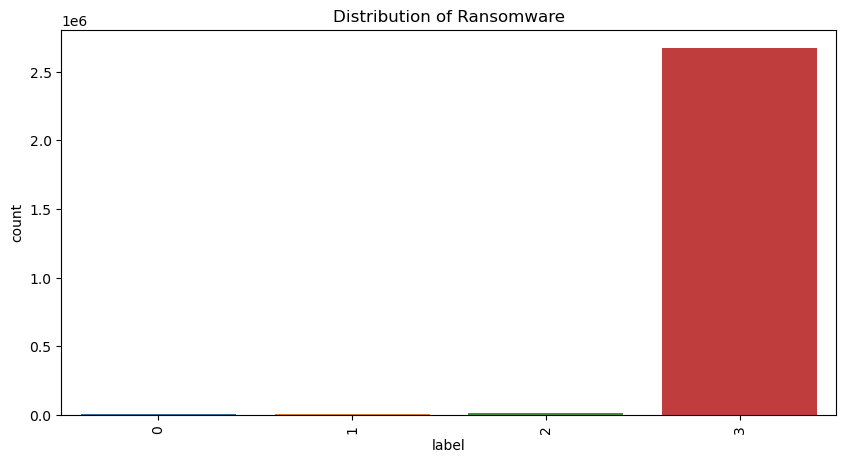

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='label')
plt.title('Distribution of Ransomware')
plt.xticks(rotation=90)
plt.show()

In [5]:
# Get the count of the majority class
majority_class_count = df['label'].value_counts().max()
majority_class_count

2671631

In [6]:
desired_samples = int(majority_class_count  * 0.007)
desired_samples
#class distribution for oversampling and undersampling
over_sampling = {0: desired_samples, 1: desired_samples, 2: desired_samples}
under_sampling = {3: desired_samples}

# oversampling and undersampling
over = SMOTE(sampling_strategy=over_sampling)
under = RandomUnderSampler(sampling_strategy=under_sampling)

# Define pipeline
pipeline = Pipeline([('SMOTE', over), ('RandomUnderSampler', under)])

X, y = pipeline.fit_resample(df.drop('label', axis=1), df['label'])

label
0    0.25
1    0.25
2    0.25
3    0.25
Name: proportion, dtype: float64


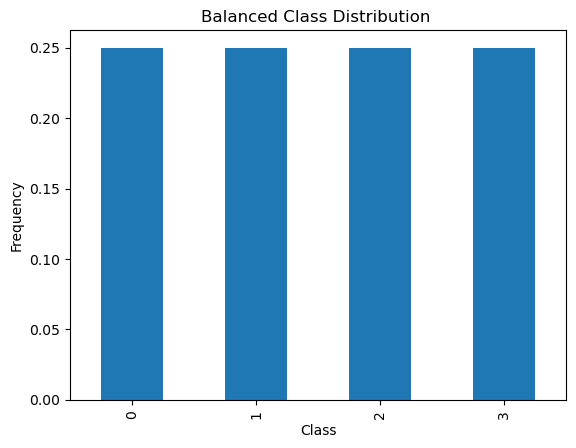

In [7]:
class_distribution =y.value_counts(normalize=True)
print(class_distribution)

class_distribution.plot(kind='bar')
plt.title('Balanced Class Distribution ')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [8]:
X

,address,year,day,length,weight,count,looped,neighbors,income,n_address_feature,...,merge_behavior,cybercrime_related,length_weight,count_looped,month,week,total_volume,average_volume,transaction_frequency,cluster
10,0.004565,0.287034,0.901076,0.356743,0.010325,0.185482,0.000000,0.000000,0.277343,0.000000,...,0.009000,0.0,0.020214,0.000000,0.864469,0.896106,0.232539,0.273717,0.154875,0.0
12,0.003043,0.715614,0.505701,1.000000,0.607370,0.998122,0.000000,0.000000,0.285142,0.000000,...,0.000462,0.0,0.974616,0.000000,0.406922,0.480341,0.239276,0.281440,0.984836,0.0
14,0.005666,0.715614,0.536601,0.834516,0.000044,0.000000,0.000000,0.000000,0.312810,0.951426,...,0.000077,0.0,0.001237,0.000000,0.490662,0.517305,0.427275,0.381831,0.250420,0.0
15,0.005666,0.715614,0.531497,0.478639,0.563233,0.185482,0.000000,0.558888,0.434381,0.951426,...,0.581020,0.0,0.758084,0.000000,0.490662,0.517305,0.427275,0.381831,0.250420,0.0
24,0.006981,0.715614,0.528938,0.427049,0.449610,0.471330,0.000000,0.298088,0.312810,0.000000,...,0.186066,0.0,0.635269,0.000000,0.490662,0.517305,0.263278,0.308854,0.407422,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245419,0.057130,0.430182,0.579293,0.552730,0.488967,0.655532,0.000000,0.298088,0.323808,0.000000,...,0.091720,0.0,0.779063,0.000000,0.490662,0.571164,0.272863,0.319757,0.583391,0.0
1985664,0.544783,0.715614,0.769116,0.356743,0.158148,0.000000,0.000000,0.298088,0.840741,0.000000,...,0.263100,0.0,0.254840,0.000000,0.722043,0.755945,0.765078,0.837394,0.000000,0.0
1497416,0.703127,0.573052,0.292308,0.478639,0.000180,0.000000,0.699322,0.298088,0.729878,0.000000,...,0.000313,0.0,0.000717,0.443266,0.223750,0.277739,0.650149,0.725268,0.000000,0.0
158465,0.724773,0.000000,0.503095,0.478639,0.009402,0.733350,0.000000,0.000000,0.277343,0.000000,...,0.000659,0.0,0.036079,0.000000,0.406922,0.480341,0.232539,0.273717,0.662543,0.0


# Data Splitting

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (52362, 26) (52362,)
Test set shape: (22442, 26) (22442,)


# Fetaure selection

Original features: Index(['address', 'year', 'day', 'length', 'weight', 'count', 'looped',
       'neighbors', 'income', 'n_address_feature', 'quarter_number',
       'is_close_to_holiday', 'day_of_week', 'average_income_per_transaction',
       'transaction_count', 'looped_ratio', 'merge_behavior',
       'cybercrime_related', 'length_weight', 'count_looped', 'month', 'week',
       'total_volume', 'average_volume', 'transaction_frequency', 'cluster'],
      dtype='object')
Selected features: Index(['address', 'year', 'day', 'weight', 'neighbors', 'income',
       'n_address_feature', 'quarter_number', 'day_of_week',
       'average_income_per_transaction', 'transaction_count', 'looped_ratio',
       'length_weight', 'month', 'week', 'total_volume', 'average_volume',
       'transaction_frequency'],
      dtype='object')
Not selected features: Index(['length', 'count', 'looped', 'is_close_to_holiday', 'merge_behavior',
       'cybercrime_related', 'count_looped', 'cluster'],
      dty

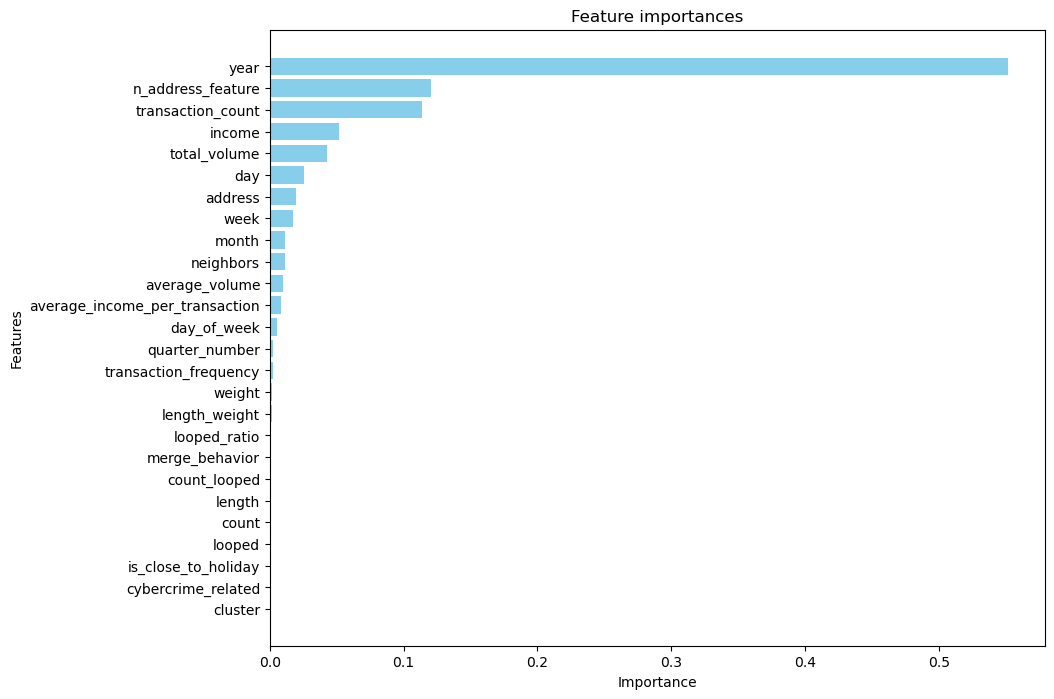

In [11]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train, y_train)  

original_feature_names = X_train.columns 
print('Original features: {}'.format(original_feature_names))

importances = gb.feature_importances_

mask = importances > 0.001  # adjust threshold as needed

# Apply the mask to the feature dataset
X_train_new = X_train.loc[:, mask]  
X_test_new = X_test.loc[:, mask] 

selected_feature_names = X_train_new.columns
print('Selected features: {}'.format(selected_feature_names))


not_selected_feature_names = original_feature_names[~mask]
print('Not selected features: {}'.format(not_selected_feature_names))

feature_importances = pd.DataFrame({'feature': original_feature_names, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances['feature'], feature_importances['importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature importances")
plt.gca().invert_yaxis()  
plt.show()

In [12]:
X_train = X_train_new.copy()

X_test = X_test_new.copy()

selected_feature_names = X_train.columns
print('Updated X_train with selected features: {}'.format(selected_feature_names))

selected_feature_names = X_test.columns
print('Updated X_test with selected features: {}'.format(selected_feature_names))

Updated X_train with selected features: Index(['address', 'year', 'day', 'weight', 'neighbors', 'income',
       'n_address_feature', 'quarter_number', 'day_of_week',
       'average_income_per_transaction', 'transaction_count', 'looped_ratio',
       'length_weight', 'month', 'week', 'total_volume', 'average_volume',
       'transaction_frequency'],
      dtype='object')
Updated X_test with selected features: Index(['address', 'year', 'day', 'weight', 'neighbors', 'income',
       'n_address_feature', 'quarter_number', 'day_of_week',
       'average_income_per_transaction', 'transaction_count', 'looped_ratio',
       'length_weight', 'month', 'week', 'total_volume', 'average_volume',
       'transaction_frequency'],
      dtype='object')


# XGboost Classifier

In [13]:
xg = XGBClassifier()

xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Accuracy of XGBoost: 0.9604313341056947
Prediction time: 0.07879257202148438 seconds
Precision of XGBoost: 0.9606194113107913
Recall of XGBoost: 0.9604313341056947
F1-score of XGBoost: 0.9602649379143545
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      5559
           1       0.98      0.99      0.99      5690
           2       0.94      0.98      0.96      5543
           3       0.96      0.91      0.93      5650

    accuracy                           0.96     22442
   macro avg       0.96      0.96      0.96     22442
weighted avg       0.96      0.96      0.96     22442



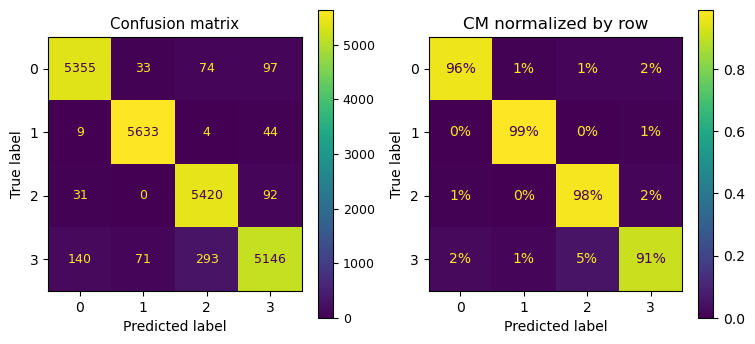

<Figure size 640x480 with 0 Axes>

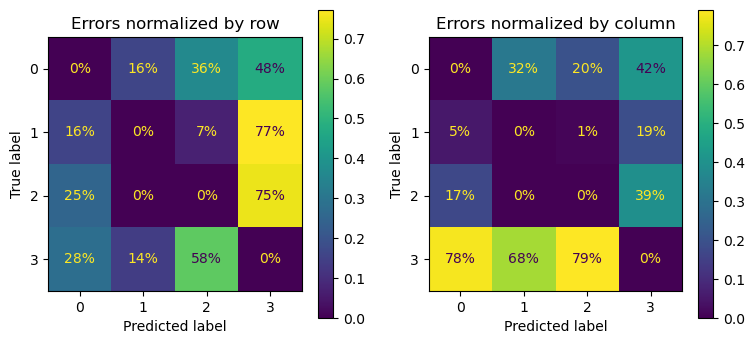

In [14]:
xg_score=xg.score(X_test,y_test)

start_time = time.time()
y_predict=xg.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

print('Accuracy of XGBoost: '+ str(xg_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))

with PdfPages('XGBoost_Confusion_matrix.pdf') as pdf:

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[1],
                                            normalize="true", values_format=".0%")
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig)

    plt.clf()

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[0],
                                            sample_weight=sample_weight,   
                                            normalize="true", values_format=".0%")
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[1],
                                            sample_weight=sample_weight,    
                                            normalize="pred", values_format=".0%")
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig) 

plt.rc('font', size=14)  


In [79]:
#!pip install optuna

In [15]:
import optuna
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

xg = XGBClassifier()

# Define the hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Create a study object
study = optuna.create_study(direction='maximize')

  # Define the objective function with cross validation
def objective(trial):
    params = {
        'max_depth': trial.suggest_categorical('max_depth', [3, 5, 7, 10]),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_categorical('n_estimators', [50, 100, 200, 300]),
        'gamma': trial.suggest_float('gamma', 0, 0.2),
        'min_child_weight': trial.suggest_categorical('min_child_weight', [1, 5, 10]),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0)
    }
    xg = XGBClassifier(**params)
    scores = cross_val_score(xg, X_train, y_train, cv=5)
    return scores.mean()

# Run the optimization
study.optimize(objective, n_trials=30)

best_params = study.best_params
best_score = study.best_value
print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

# Fit the model with the optimized parameters
xg_opt = XGBClassifier(**best_params)
xg_opt.fit(X_train, y_train)

# Save the model to a file
pickle.dump(xg_opt, open("xgboost_optuna_model.pkl", "wb"))

[I 2024-06-11 08:49:13,781] A new study created in memory with name: no-name-e8de31ef-7832-43ab-84c1-546dec92ceaf
[I 2024-06-11 08:49:34,410] Trial 0 finished with value: 0.9522362917719885 and parameters: {'max_depth': 3, 'learning_rate': 0.1888885122536097, 'n_estimators': 300, 'gamma': 0.16572473771777826, 'min_child_weight': 10, 'subsample': 0.8578179162691727, 'colsample_bytree': 0.7914274282265511}. Best is trial 0 with value: 0.9522362917719885.
[I 2024-06-11 08:49:42,828] Trial 1 finished with value: 0.9420189731578681 and parameters: {'max_depth': 3, 'learning_rate': 0.2858389603348893, 'n_estimators': 100, 'gamma': 0.17763857243483583, 'min_child_weight': 10, 'subsample': 0.5796026934314893, 'colsample_bytree': 0.6578820485971975}. Best is trial 0 with value: 0.9522362917719885.
[I 2024-06-11 08:50:10,128] Trial 2 finished with value: 0.9578892360048105 and parameters: {'max_depth': 10, 'learning_rate': 0.2097318811062483, 'n_estimators': 200, 'gamma': 0.0845400664046419, 'mi

Best score: 0.9610785696013255

Optimized parameters: {'max_depth': 10, 'learning_rate': 0.12607052938630856, 'n_estimators': 300, 'gamma': 0.14264119317122803, 'min_child_weight': 1, 'subsample': 0.9058027207276127, 'colsample_bytree': 0.5832010331042603}



Accuracy of XGBoost: 0.9636396043133411
Prediction time: 0.21490931510925293 seconds
Precision of XGBoost: 0.9638046923923913
Recall of XGBoost: 0.9636396043133411
F1-score of XGBoost: 0.9635333124781963
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5559
           1       0.99      0.99      0.99      5690
           2       0.94      0.98      0.96      5543
           3       0.96      0.92      0.94      5650

    accuracy                           0.96     22442
   macro avg       0.96      0.96      0.96     22442
weighted avg       0.96      0.96      0.96     22442



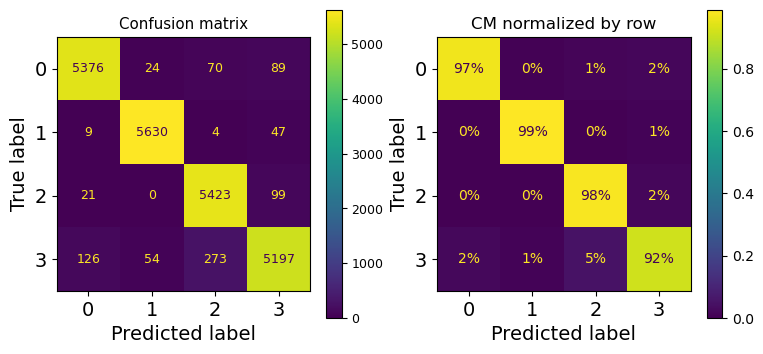

<Figure size 640x480 with 0 Axes>

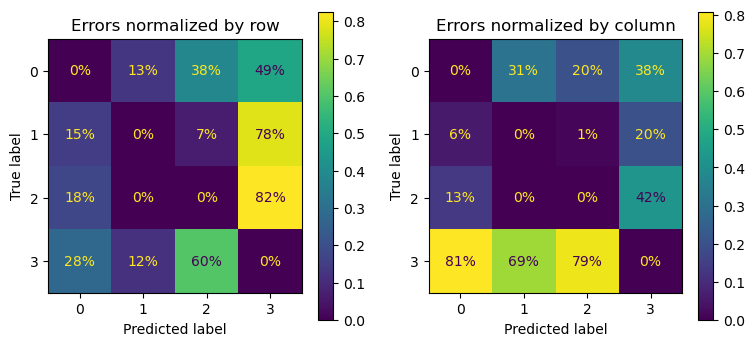

In [16]:
# Load the model from the file
xg_opt = pickle.load(open("xgboost_optuna_model.pkl", "rb"))

# Evaluation on the test set
xg_score=xg_opt.score(X_test,y_test)

start_time = time.time()
y_predict=xg_opt.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

print('Accuracy of XGBoost: '+ str(xg_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))

with PdfPages('XGBoost_Confusion_matrix_tuned.pdf') as pdf:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[1],
                                            normalize="true", values_format=".0%")
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig)

    plt.clf() 
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[0],
                                            sample_weight=sample_weight,    
                                            normalize="true", values_format=".0%")
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_true,y_predict, ax=axs[1],
                                            sample_weight=sample_weight,    
                                            normalize="pred", values_format=".0%")
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig) 

plt.rc('font', size=14) 

# Random Forest

In [17]:
# Define the model
rf = RandomForestClassifier()

# Fit the model
rf.fit(X_train, y_train)

start_time = time.time()
y_predict = rf.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

Accuracy of RandomForest: 0.9573567418233669
Prediction time: 0.5972118377685547 seconds
Precision of RandomForest: 0.9574114397004818
Recall of RandomForest: 0.9573567418233669
F1-score of RandomForest: 0.9572388717684837
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      5559
           1       0.98      0.99      0.98      5690
           2       0.94      0.97      0.95      5543
           3       0.94      0.91      0.93      5650

    accuracy                           0.96     22442
   macro avg       0.96      0.96      0.96     22442
weighted avg       0.96      0.96      0.96     22442



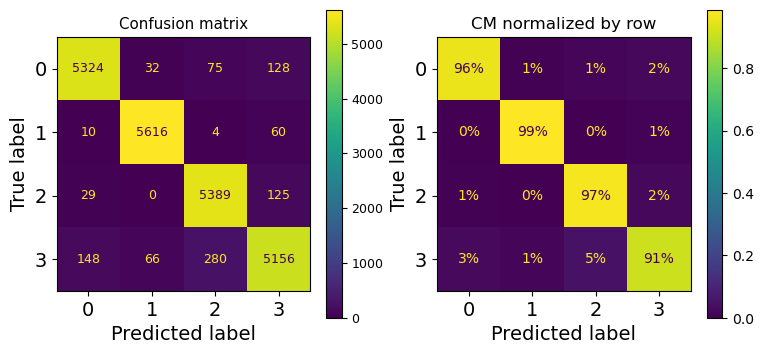

<Figure size 640x480 with 0 Axes>

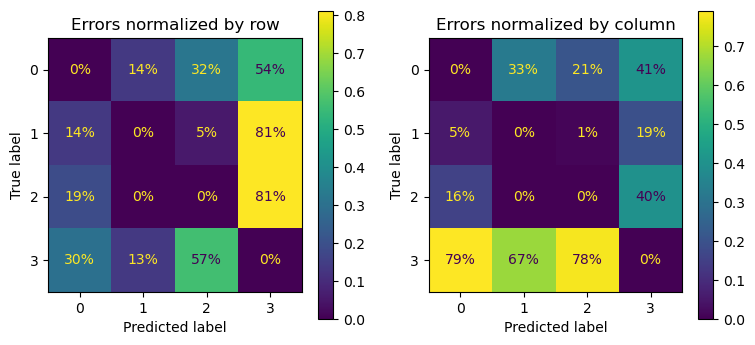

In [18]:
rf_score = rf.score(X_test, y_test)

print('Accuracy of RandomForest: '+ str(rf_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RandomForest: '+(str(precision)))
print('Recall of RandomForest: '+(str(recall)))
print('F1-score of RandomForest: '+(str(fscore)))
print(classification_report(y_true, y_predict))

with PdfPages('RandomForest_Confusion_matrix.pdf') as pdf:
    # Part 1
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            normalize="true", values_format=".0%")
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

    plt.clf()  # clear the figure for the next plot

    # Part 2
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                            sample_weight=sample_weight,    
                                            normalize="true", values_format=".0%")
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            sample_weight=sample_weight,   
                                            normalize="pred", values_format=".0%")
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

plt.rc('font', size=14)  # make fonts great again


In [26]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model
rf = RandomForestClassifier()

# Create a study object
study = optuna.create_study(direction='maximize')

# Define the objective function with cross validation
def objective(trial):
    params = {
        'n_estimators': trial.suggest_categorical('n_estimators', [100, 200, 300, 400]),
        'max_depth': trial.suggest_categorical('max_depth', [None, 10, 20, 30, 40]),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', [ 'sqrt', 'log2'])
    }
    rf = RandomForestClassifier(**params)
    scores = cross_val_score(rf, X_train, y_train, cv=5, error_score='raise')
    return scores.mean()

# Run the optimization
study.optimize(objective, n_trials=3)

# Print the result
best_params = study.best_params
best_score = study.best_value
print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

# Fit the model with the optimized parameters
rf_opt = RandomForestClassifier(**best_params)
rf_opt.fit(X_train, y_train)

# Save the model to a file
pickle.dump(rf_opt, open("randomforest_optuna_model.pkl", "wb"))

[I 2024-06-11 09:38:06,163] A new study created in memory with name: no-name-4d93cb5a-9efa-4a50-a70a-854578137c97
[I 2024-06-11 09:41:24,104] Trial 0 finished with value: 0.9543179788516538 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9543179788516538.
[I 2024-06-11 09:44:35,052] Trial 1 finished with value: 0.9528856369505434 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9543179788516538.
[I 2024-06-11 09:50:49,738] Trial 2 finished with value: 0.9510713641983968 and parameters: {'n_estimators': 400, 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9543179788516538.


Best score: 0.9543179788516538

Optimized parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt'}



Accuracy of RandomForest: 0.9559308439533019
Prediction time: 1.0082430839538574 seconds
Precision of RandomForest: 0.9560529863974055
Recall of RandomForest: 0.9559308439533019
F1-score of RandomForest: 0.955841203692753
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      5559
           1       0.98      0.99      0.98      5690
           2       0.93      0.97      0.95      5543
           3       0.94      0.91      0.93      5650

    accuracy                           0.96     22442
   macro avg       0.96      0.96      0.96     22442
weighted avg       0.96      0.96      0.96     22442



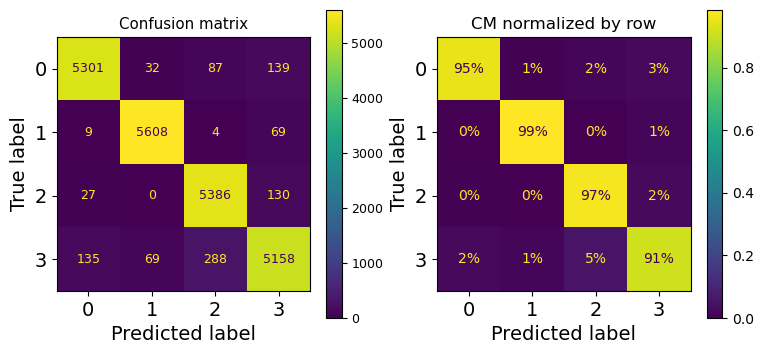

<Figure size 640x480 with 0 Axes>

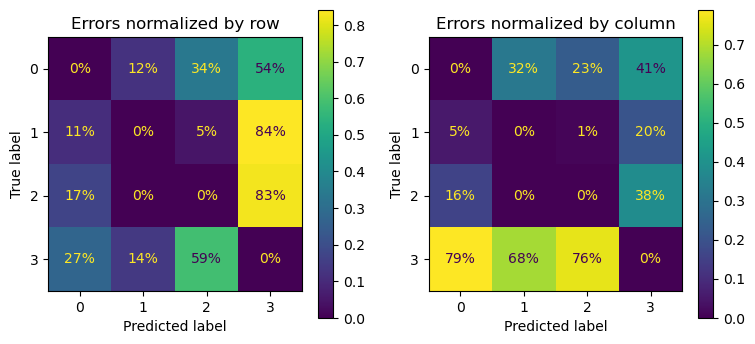

In [27]:
# Load the model from the file
rf_opt = pickle.load(open("randomforest_optuna_model.pkl", "rb"))

# Evaluation on the test set
rf_score = rf_opt.score(X_test, y_test)

start_time = time.time()
y_predict = rf_opt.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

print('Accuracy of RandomForest: '+ str(rf_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of RandomForest: '+(str(precision)))
print('Recall of RandomForest: '+(str(recall)))
print('F1-score of RandomForest: '+(str(fscore)))
print(classification_report(y_true, y_predict))

with PdfPages('RandomForest_Confusion_matrix_tuned.pdf') as pdf:
    # Part 1
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            normalize="true", values_format=".0%")
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

    plt.clf()  # clear the figure for the next plot

    # Part 2
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                            sample_weight=sample_weight,    
                                            normalize="true", values_format=".0%")
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            sample_weight=sample_weight,    
                                            normalize="pred", values_format=".0%")
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig)  # saves the current figure into a pdf page

plt.rc('font', size=14)  # make fonts great again


# Decision Tree

In [22]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

start_time = time.time()
y_predict = dt.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

Accuracy of DecisionTree: 0.9371713751002585
Prediction time: 0.0 seconds
Precision of DecisionTree: 0.9372016468317712
Recall of DecisionTree: 0.9371713751002585
F1-score of DecisionTree: 0.9371812901505783
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5559
           1       0.98      0.97      0.98      5690
           2       0.93      0.93      0.93      5543
           3       0.90      0.90      0.90      5650

    accuracy                           0.94     22442
   macro avg       0.94      0.94      0.94     22442
weighted avg       0.94      0.94      0.94     22442



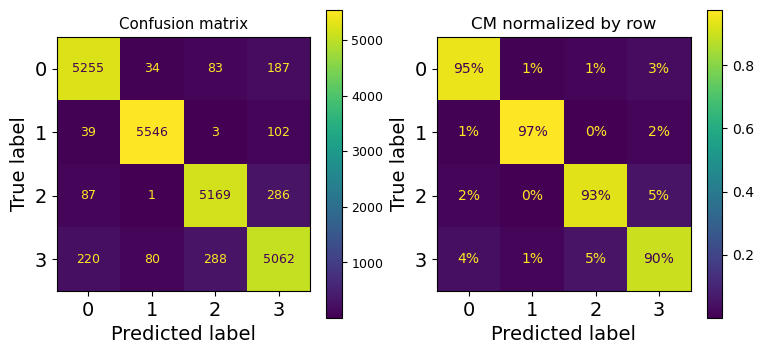

<Figure size 640x480 with 0 Axes>

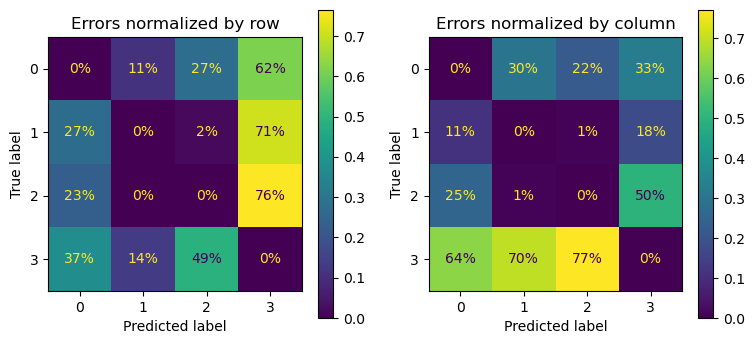

In [23]:
dt_score = dt.score(X_test, y_test)

print('Accuracy of DecisionTree: '+ str(dt_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DecisionTree: '+(str(precision)))
print('Recall of DecisionTree: '+(str(recall)))
print('F1-score of DecisionTree: '+(str(fscore)))
print(classification_report(y_true, y_predict))

with PdfPages('DecisionTree_Confusion_matrix.pdf') as pdf:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            normalize="true", values_format=".0%")
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig)  
    plt.clf() 

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                            sample_weight=sample_weight,    
                                            normalize="true", values_format=".0%")
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            sample_weight=sample_weight,    
                                            normalize="pred", values_format=".0%")
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig) 

plt.rc('font', size=14) 

In [24]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a study object
study = optuna.create_study(direction='maximize')

# Define the objective function with cross validation
def objective(trial):
    params = {
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'splitter': trial.suggest_categorical('splitter', ['best', 'random']),
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 15),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 15)
    }
    dt = DecisionTreeClassifier(**params)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    return scores.mean()

# Run the optimization
study.optimize(objective, n_trials=30)

# Print the result
best_params = study.best_params
best_score = study.best_value
print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

# Fit the model with the optimized parameters
dt_opt = DecisionTreeClassifier(**best_params)
dt_opt.fit(X_train, y_train)
# Save the model to a file
pickle.dump(dt_opt, open("decisiontree_optuna_model.pkl", "wb"))

[I 2024-06-11 09:36:00,578] A new study created in memory with name: no-name-62670747-7c48-42f3-a101-ccffea3fc19c
[I 2024-06-11 09:36:06,818] Trial 0 finished with value: 0.9388869552664689 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.9388869552664689.
[I 2024-06-11 09:36:11,046] Trial 1 finished with value: 0.9349337380846977 and parameters: {'criterion': 'gini', 'splitter': 'best', 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 15}. Best is trial 0 with value: 0.9388869552664689.
[I 2024-06-11 09:36:11,609] Trial 2 finished with value: 0.9290706350507183 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 16, 'min_samples_split': 14, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9388869552664689.
[I 2024-06-11 09:36:15,706] Trial 3 finished with value: 0.9306557689871082 and parameters: {'criterion': 'gini', 'splitter': 'best', 

Best score: 0.9388869552664689

Optimized parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 10}



Accuracy of DecisionTree: 0.9417164245610908
Prediction time: 0.0049974918365478516 seconds
Precision of DecisionTree: 0.9416157299552211
Recall of DecisionTree: 0.9417164245610908
F1-score of DecisionTree: 0.9415247277869312
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5559
           1       0.98      0.98      0.98      5690
           2       0.93      0.95      0.94      5543
           3       0.92      0.89      0.90      5650

    accuracy                           0.94     22442
   macro avg       0.94      0.94      0.94     22442
weighted avg       0.94      0.94      0.94     22442



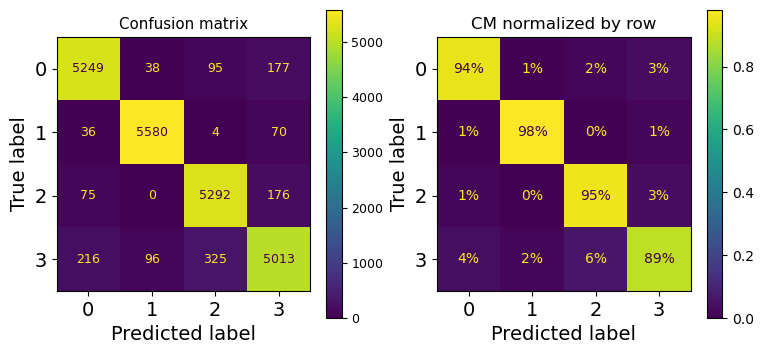

<Figure size 640x480 with 0 Axes>

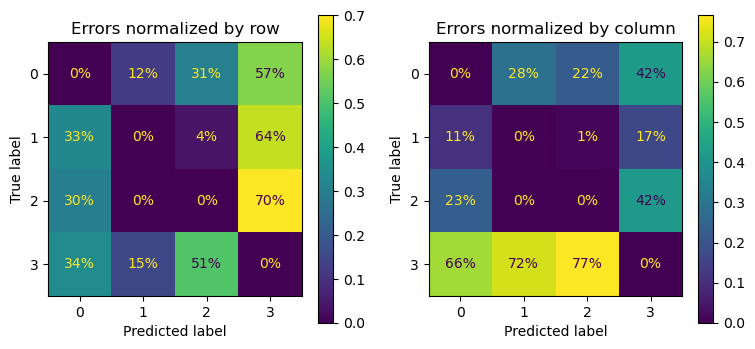

In [25]:
dt_opt = pickle.load(open("decisiontree_optuna_model.pkl", "rb"))

dt_score = dt_opt.score(X_test, y_test)
start_time = time.time()
y_predict = dt_opt.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
y_true=y_test
sample_weight = (y_predict != y_true)

print('Accuracy of DecisionTree: '+ str(dt_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of DecisionTree: '+(str(precision)))
print('Recall of DecisionTree: '+(str(recall)))
print('F1-score of DecisionTree: '+(str(fscore)))
print(classification_report(y_true, y_predict))

with PdfPages('DecisionTree_Confusion_matrix_tuned.pdf') as pdf:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            normalize="true", values_format=".0%")
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig) 
    plt.clf() 
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                            sample_weight=sample_weight,    
                                            normalize="true", values_format=".0%")
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            sample_weight=sample_weight,    
                                            normalize="pred", values_format=".0%")
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig)
    
plt.rc('font', size=14)

# STACKING

In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
rf = RandomForestClassifier()
xgb = XGBClassifier()
dt = DecisionTreeClassifier()

# Define meta learner model
mlp = MLPClassifier(max_iter=200, verbose=True)

# Define the stacking ensemble
model = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('dt', dt)], final_estimator=mlp, cv=5)

# Fit the model on our training data
model.fit(X_train, y_train)

start_time = time.time()
y_predict = model.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time

y_true=y_test
sample_weight = (y_predict != y_true)

Iteration 1, loss = 0.35711026
Iteration 2, loss = 0.13049532
Iteration 3, loss = 0.12748596
Iteration 4, loss = 0.12604453
Iteration 5, loss = 0.12527900
Iteration 6, loss = 0.12449519
Iteration 7, loss = 0.12367575
Iteration 8, loss = 0.12294072
Iteration 9, loss = 0.12180766
Iteration 10, loss = 0.12112904
Iteration 11, loss = 0.12010508
Iteration 12, loss = 0.11940350
Iteration 13, loss = 0.11862933
Iteration 14, loss = 0.11793503
Iteration 15, loss = 0.11750567
Iteration 16, loss = 0.11698142
Iteration 17, loss = 0.11636158
Iteration 18, loss = 0.11596565
Iteration 19, loss = 0.11561857
Iteration 20, loss = 0.11530324
Iteration 21, loss = 0.11513215
Iteration 22, loss = 0.11468193
Iteration 23, loss = 0.11480180
Iteration 24, loss = 0.11431207
Iteration 25, loss = 0.11428226
Iteration 26, loss = 0.11393479
Iteration 27, loss = 0.11385764
Iteration 28, loss = 0.11371804
Iteration 29, loss = 0.11362050
Iteration 30, loss = 0.11342661
Iteration 31, loss = 0.11332549
Iteration 32, los

Accuracy of StackingClassifier: 0.9620800285179574
Prediction time: 0.6438395977020264 seconds
Precision of StackingClassifier: 0.9621793193604149
Recall of StackingClassifier: 0.9620800285179574
F1-score of StackingClassifier: 0.9620079221688428
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5559
           1       0.99      0.99      0.99      5690
           2       0.94      0.97      0.96      5543
           3       0.95      0.92      0.94      5650

    accuracy                           0.96     22442
   macro avg       0.96      0.96      0.96     22442
weighted avg       0.96      0.96      0.96     22442



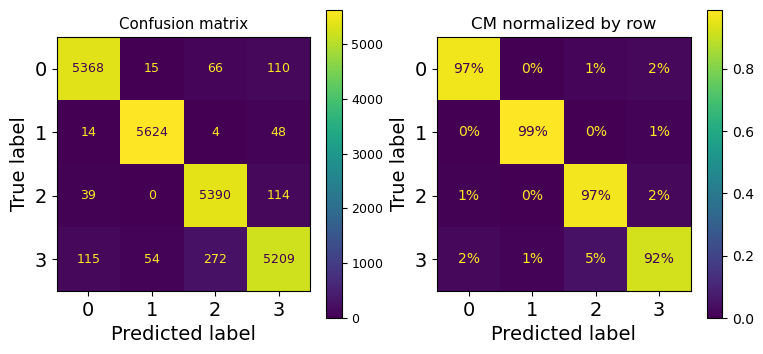

<Figure size 640x480 with 0 Axes>

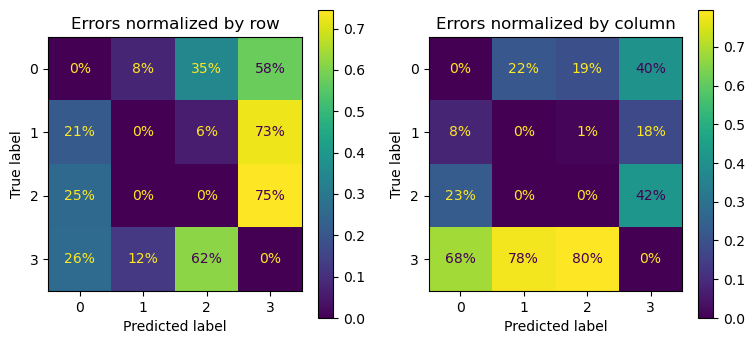

In [30]:
model_score = model.score(X_test, y_test)

print('Accuracy of StackingClassifier: '+ str(model_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of StackingClassifier: '+(str(precision)))
print('Recall of StackingClassifier: '+(str(recall)))
print('F1-score of StackingClassifier: '+(str(fscore)))
print(classification_report(y_true, y_predict))

with PdfPages('StackingClassifier_Confusion_matrix.pdf') as pdf:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            normalize="true", values_format=".0%")
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig) 
    plt.clf() 

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                            sample_weight=sample_weight,    
                                            normalize="true", values_format=".0%")
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            sample_weight=sample_weight,    
                                            normalize="pred", values_format=".0%")
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig) 

plt.rc('font', size=14) 

In [33]:
import optuna
from sklearn.ensemble import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Define the base models
rf = rf_opt
xgb = xg_opt
dt = dt_opt

# Create a study object
study = optuna.create_study(direction='maximize')

# Define the objective function
def objective(trial):
    layer_sizes = trial.suggest_categorical('hidden_layer_sizes', ['50_50', '100'])
    layer_sizes = tuple(map(int, layer_sizes.split('_'))) if '_' in layer_sizes else int(layer_sizes)
    alpha = trial.suggest_float('alpha', 1e-4, 1e-1, log=True)
    learning_rate_init = trial.suggest_float('learning_rate_init', 1e-4, 1e-1, log=True)
    
    # Define meta learner model with the suggested parameters
    mlp = MLPClassifier(hidden_layer_sizes=layer_sizes, alpha=alpha, learning_rate_init=learning_rate_init, max_iter=200)

    # Define the stacking ensemble with the new meta learner
    model = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('dt', dt)], final_estimator=mlp, cv=5)

    # Perform cross validation and return the mean score
    scores = cross_val_score(model, X_train, y_train, cv=5)
    return scores.mean()  

# Run the optimization
study.optimize(objective, n_trials=3)  

# Get the best score and parameters
best_score = study.best_value
best_params = study.best_params

# Print the result
print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

# Define the best model using the optimized parameters
layer_sizes = tuple(map(int, best_params['hidden_layer_sizes'].split('_'))) if '_' in best_params['hidden_layer_sizes'] else int(best_params['hidden_layer_sizes'])
mlp = MLPClassifier(hidden_layer_sizes=layer_sizes, alpha=best_params['alpha'], learning_rate_init=best_params['learning_rate_init'], max_iter=200)
model = StackingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('dt', dt)], final_estimator=mlp, cv=5)

model.fit(X_train, y_train)

# Save the model to a file
pickle.dump(model, open("stacking_optuna_model.pkl", "wb"))

[I 2024-06-11 11:06:03,147] A new study created in memory with name: no-name-566c382b-1e96-4b70-9a3b-ccca56f0a2f6
[I 2024-06-11 11:17:09,341] Trial 0 finished with value: 0.9602383045872186 and parameters: {'hidden_layer_sizes': '100', 'alpha': 0.0006776276086566497, 'learning_rate_init': 0.00015506233706104544}. Best is trial 0 with value: 0.9602383045872186.
[I 2024-06-11 11:26:47,665] Trial 1 finished with value: 0.9591688533437905 and parameters: {'hidden_layer_sizes': '50_50', 'alpha': 0.014835828436303301, 'learning_rate_init': 0.012904362809126674}. Best is trial 0 with value: 0.9602383045872186.
[I 2024-06-11 11:37:51,666] Trial 2 finished with value: 0.9601237351793402 and parameters: {'hidden_layer_sizes': '100', 'alpha': 0.004687138734037864, 'learning_rate_init': 0.00019416692750486573}. Best is trial 0 with value: 0.9602383045872186.


Best score: 0.9602383045872186

Optimized parameters: {'hidden_layer_sizes': '100', 'alpha': 0.0006776276086566497, 'learning_rate_init': 0.00015506233706104544}



Accuracy of StackingClassifier: 0.9616344354335621
Prediction time: 0.5977442264556885 seconds
Precision of StackingClassifier: 0.9616658695881461
Recall of StackingClassifier: 0.9616344354335621
F1-score of StackingClassifier: 0.9615423521585306
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5559
           1       0.99      0.99      0.99      5690
           2       0.94      0.97      0.96      5543
           3       0.95      0.92      0.93      5650

    accuracy                           0.96     22442
   macro avg       0.96      0.96      0.96     22442
weighted avg       0.96      0.96      0.96     22442



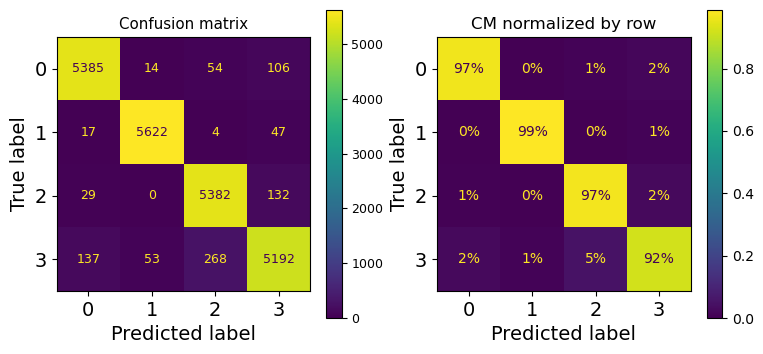

<Figure size 640x480 with 0 Axes>

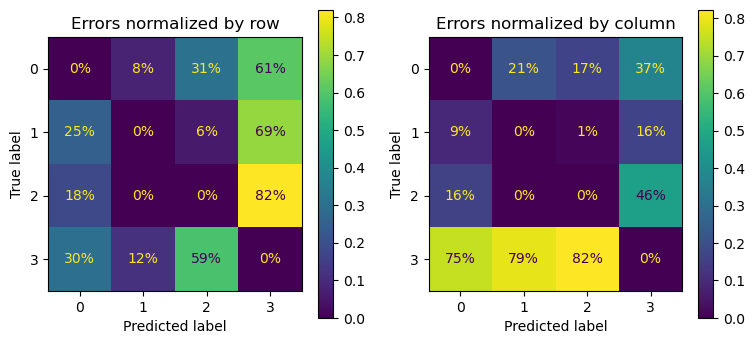

In [34]:
model = pickle.load(open("stacking_optuna_model.pkl", "rb"))

model_score = model.score(X_test, y_test)
start_time = time.time()
y_predict = model.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
y_true=y_test
sample_weight = (y_predict != y_true)

model_score = model.score(X_test, y_test)

print('Accuracy of StackingClassifier: '+ str(model_score))
print('Prediction time: '+ str(prediction_time) + ' seconds')
precision, recall, fscore, none = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of StackingClassifier: '+(str(precision)))
print('Recall of StackingClassifier: '+(str(recall)))
print('F1-score of StackingClassifier: '+(str(fscore)))
print(classification_report(y_true, y_predict))

with PdfPages('StackingClassifier_Confusion_matrix_tuned.pdf') as pdf:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            normalize="true", values_format=".0%")
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig)

    plt.clf() 

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                            sample_weight=sample_weight,    
                                            normalize="true", values_format=".0%")
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            sample_weight=sample_weight,    
                                            normalize="pred", values_format=".0%")
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig) 
    
plt.rc('font', size=14)  

# SVM

Accuracy of SVM: 0.8657873629801266
Prediction time: 65.54607605934143 seconds
Precision of SVM: 0.8735065259568492
Recall of SVM: 0.8657873629801266
F1-score of SVM: 0.8636990178461881
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      5559
           1       0.90      0.97      0.93      5690
           2       0.78      0.97      0.87      5543
           3       0.91      0.76      0.82      5650

    accuracy                           0.87     22442
   macro avg       0.87      0.87      0.86     22442
weighted avg       0.87      0.87      0.86     22442



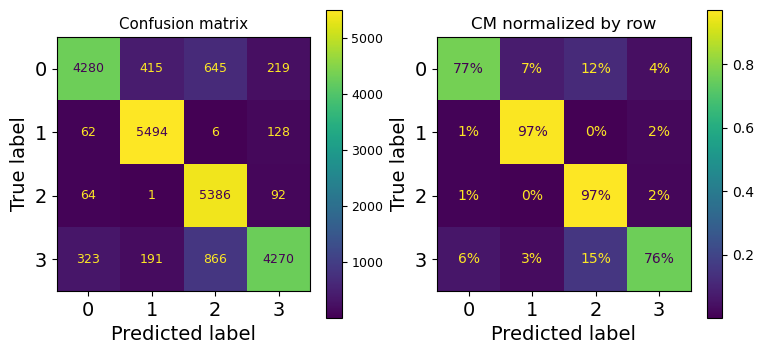

<Figure size 640x480 with 0 Axes>

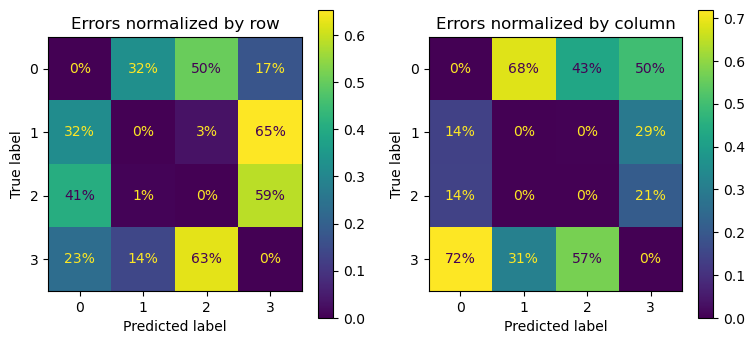

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, classification_report, ConfusionMatrixDisplay
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import time

# Train SVM classifier
svm = SVC()

svm.fit(X_train, y_train)

start_time = time.time()
y_predict = svm.predict(X_test)
end_time = time.time()

prediction_time = end_time - start_time

y_true = y_test
sample_weight = (y_predict != y_true)
svm_score = svm.score(X_test, y_test)

print('Accuracy of SVM: ' + str(svm_score))
print('Prediction time: ' + str(prediction_time) + ' seconds')
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of SVM: ' + str(precision))
print('Recall of SVM: ' + str(recall))
print('F1-score of SVM: ' + str(fscore))
print(classification_report(y_true, y_predict))

with PdfPages('SVM_Confusion_matrix.pdf') as pdf:

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            normalize="true", values_format=".0%")
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig) 
    plt.clf() 
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                            sample_weight=sample_weight,    
                                            normalize="true", values_format=".0%")
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            sample_weight=sample_weight,   
                                            normalize="pred", values_format=".0%")
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig) 

plt.rc('font', size=14)


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Create a study object
study = optuna.create_study(direction='maximize')

# Define the objective function with cross validation
def objective(trial):
    params = {
        'C': trial.suggest_float('C', 1e-5, 1e2, log=True),
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
        'degree': trial.suggest_int('degree', 1, 5),  # Only used for 'poly' kernel
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto']),
        'coef0': trial.suggest_float('coef0', 0.0, 1.0)  # Only used for 'poly' and 'sigmoid' kernels
    }
    
    # To ensure degree and coef0 are only used for relevant kernels
    if params['kernel'] != 'poly':
        params.pop('degree')
    if params['kernel'] not in ['poly', 'sigmoid']:
        params.pop('coef0')
    
    svc = SVC(**params)
    scores = cross_val_score(svc, X_train, y_train, cv=5)
    return scores.mean()

# Run the optimization
study.optimize(objective, n_trials=30)

# Print the result
best_params = study.best_params
best_score = study.best_value
print(f'Best score: {best_score}\n')
print(f'Optimized parameters: {best_params}\n')

# Fit the model with the optimized parameters
svc_opt = SVC(**best_params)
svc_opt.fit(X_train, y_train)

# Save the model to a file
pickle.dump(svc_opt, open("svm_optuna_model.pkl", "wb"))

[I 2024-06-11 11:52:09,107] A new study created in memory with name: no-name-54e003c5-beac-4b56-a292-3f71e38ae332
[I 2024-06-11 12:05:55,380] Trial 0 finished with value: 0.6026124855817174 and parameters: {'C': 0.012714601807811383, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'coef0': 0.17143639957937906}. Best is trial 0 with value: 0.6026124855817174.
[I 2024-06-11 12:19:20,013] Trial 1 finished with value: 0.6325960560521702 and parameters: {'C': 0.0054046597430285415, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'coef0': 0.534244185113339}. Best is trial 1 with value: 0.6325960560521702.
[I 2024-06-11 12:37:56,749] Trial 2 finished with value: 0.25128910187548364 and parameters: {'C': 8.091029793616646e-05, 'kernel': 'poly', 'degree': 3, 'gamma': 'auto', 'coef0': 0.7777051254405256}. Best is trial 1 with value: 0.6325960560521702.


In [ ]:
import time
import pickle
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Load the optimized SVM model
svc_opt = pickle.load(open("svm_optuna_model.pkl", "rb"))

# Evaluate the model on the test data
svc_score = svc_opt.score(X_test, y_test)
start_time = time.time()
y_predict = svc_opt.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time
y_true = y_test
sample_weight = (y_predict != y_true)

print('Accuracy of SVM: ' + str(svc_score))
print('Prediction time: ' + str(prediction_time) + ' seconds')
precision, recall, fscore, _ = precision_recall_fscore_support(y_true, y_predict, average='weighted')
print('Precision of SVM: ' + str(precision))
print('Recall of SVM: ' + str(recall))
print('F1-score of SVM: ' + str(fscore))
print(classification_report(y_true, y_predict))

# Generate confusion matrix and save to PDF
with PdfPages('SVM_Confusion_matrix_tuned.pdf') as pdf:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=9)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0])
    axs[0].set_title("Confusion matrix")
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            normalize="true", values_format=".0%")
    axs[1].set_title("CM normalized by row")
    plt.show()
    pdf.savefig(fig)
    plt.clf()
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    plt.rc('font', size=10)
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[0],
                                            sample_weight=sample_weight,    
                                            normalize="true", values_format=".0%")
    axs[0].set_title("Errors normalized by row")
    ConfusionMatrixDisplay.from_predictions(y_true, y_predict, ax=axs[1],
                                            sample_weight=sample_weight,    
                                            normalize="pred", values_format=".0%")
    axs[1].set_title("Errors normalized by column")
    plt.show()
    pdf.savefig(fig)

plt.rc('font', size=14)